In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [9]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\1-Project 4 Customer Churn\Dataset\customer_churn.csv",header=0,index_col=0,delimiter=' *, *')

In [10]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [11]:
df.shape

(7043, 20)

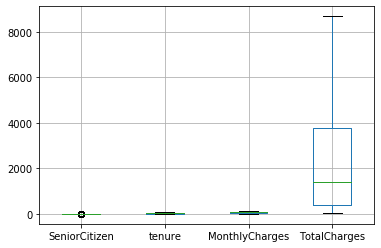

In [12]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()


# Checking the missing Value

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
round(df["TotalCharges"].mean())

2283

# Handaling the missing values

In [15]:
df["TotalCharges"].fillna(round(df["TotalCharges"].mean()),inplace=True)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Converting categorical data to numerical

In [17]:
colname=[]
for x in df.columns:
    if df[x].dtype=="object":
        colname.append(x)
colname

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
for x in colname:
    df[x]=le.fit_transform(df[x])


In [19]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
9305-CDSKC,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
1452-KIOVK,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
6713-OKOMC,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
7892-POOKP,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1


In [20]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
Y=Y.astype(int)

In [21]:
X.shape

(7043, 19)

In [22]:
Y.shape

(7043,)

In [23]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45


In [24]:
Y

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7043, dtype: int32

# Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99497117],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17387545],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.96039919],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85518202],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87277708],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.0139176 ]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
print(classifier.coef_)#coef is used to know the value of the coefficient which is nothing but the change in the value with the value change
print(classifier.intercept_)

[[-0.02766152  0.06765546 -0.00700864 -0.04855359 -1.14201282 -0.27802137
   0.04929221  0.17615279 -0.26830541 -0.1536223  -0.06940737 -0.21283888
  -0.04921902  0.0206216  -0.58864382  0.2216825   0.0427723   0.76403665
   0.40260334]]
[-1.69017907]


In [28]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.81576855 0.18423145]
 [0.33928662 0.66071338]
 [0.79219622 0.20780378]
 ...
 [0.96428213 0.03571787]
 [0.44687435 0.55312565]
 [0.7576726  0.2423274 ]]


In [29]:
#0---->No
#1---->yes.

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1386  170]
 [ 249  308]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.60       557

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Accracy of the model: 0.8017037387600567


In [31]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 451  , type 2 error : 190  , type 1 error: 261
Errors at threshold  0.41000000000000003 : 451  , type 2 error : 199  , type 1 error: 252
Errors at threshold  0.42000000000000004 : 448  , type 2 error : 204  , type 1 error: 244
Errors at threshold  0.43000000000000005 : 446  , type 2 error : 208  , type 1 error: 238
Errors at threshold  0.44000000000000006 : 443  , type 2 error : 212  , type 1 error: 231
Errors at threshold  0.45000000000000007 : 444  , type 2 error : 222  , type 1 error: 222
Errors at threshold  0.4600000000000001 : 434  , type 2 error : 226  , type 1 error: 208
Errors at threshold  0.4700000000000001 : 434  , type 2 error : 230  , type 1 error: 204
Errors at threshold  0.4800000000000001 : 425  , type 2 error : 234  , type 1 error: 191
Errors at threshold  0.4900000000000001 : 423  , type 2 error : 241  , type 1 error: 182
Errors at threshold  0.5000000000000001 : 419  , type 2 error : 249  , type 1 error: 170
Errors at threshold  0.51000000

In [32]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.44:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1386  170]
 [ 249  308]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.60       557

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Accracy of the model: 0.8017037387600567


In [34]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Upsampling the data.

In [35]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=5174, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [36]:
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]
X

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.00000e+00,
        2.98500e+01, 2.98500e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        5.69500e+01, 1.88950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.23000e+01, 1.84075e+03],
       ...,
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        9.94500e+01, 1.20015e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        3.35500e+01, 1.44530e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        4.57000e+01, 4.57000e+01]])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[-1.00406703 -0.49371044  1.11565473 ...  0.35408476 -1.31024663
  -0.92541977]
 [ 0.99594945 -0.49371044 -0.89633466 ...  1.33825587 -0.37218793
  -0.07158597]
 [ 0.99594945 -0.49371044 -0.89633466 ... -1.61425747 -0.87929346
  -0.09396889]
 ...
 [ 0.99594945  2.02547873 -0.89633466 ...  0.35408476  1.09893732
  -0.38809194]
 [-1.00406703 -0.49371044  1.11565473 ...  1.33825587 -1.18217219
  -0.27553455]
 [ 0.99594945 -0.49371044 -0.89633466 ...  1.33825587 -0.76160344
  -0.91814245]]


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Logistic Regression using upsampling data

In [39]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
print(classifier.coef_)#coef is used to know the value of the coefficient which is nothing but the change in the value with the value change
print(classifier.intercept_)

[[-0.0358604   0.10339038 -0.00795992 -0.04202779 -1.31056718 -0.27077778
   0.05400262  0.13779401 -0.2419966  -0.15502115 -0.14026997 -0.21369768
   0.01829364  0.00672689 -0.62945249  0.14867356  0.05449646  0.60087367
   0.70774174]]
[-0.19842605]


In [40]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.48145715 0.51854285]
 [0.99128282 0.00871718]
 [0.15006671 0.84993329]
 ...
 [0.19282875 0.80717125]
 [0.81924417 0.18075583]
 [0.99601978 0.00398022]]


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1142  445]
 [ 294 1224]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1587
         1.0       0.73      0.81      0.77      1518

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105

Accracy of the model: 0.7619967793880837


# Adjusting the threshold.

In [42]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 784  , type 2 error : 185  , type 1 error: 599
Errors at threshold  0.41000000000000003 : 776  , type 2 error : 193  , type 1 error: 583
Errors at threshold  0.42000000000000004 : 774  , type 2 error : 213  , type 1 error: 561
Errors at threshold  0.43000000000000005 : 768  , type 2 error : 227  , type 1 error: 541
Errors at threshold  0.44000000000000006 : 755  , type 2 error : 233  , type 1 error: 522
Errors at threshold  0.45000000000000007 : 750  , type 2 error : 241  , type 1 error: 509
Errors at threshold  0.4600000000000001 : 742  , type 2 error : 250  , type 1 error: 492
Errors at threshold  0.4700000000000001 : 727  , type 2 error : 256  , type 1 error: 471
Errors at threshold  0.4800000000000001 : 734  , type 2 error : 273  , type 1 error: 461
Errors at threshold  0.4900000000000001 : 739  , type 2 error : 286  , type 1 error: 453
Errors at threshold  0.5000000000000001 : 739  , type 2 error : 294  , type 1 error: 445
Errors at threshold  0.51000000

In [43]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.47:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,y_pred_class))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,y_pred_class)
print("Accracy of the model:",acc)

[[1116  471]
 [ 256 1262]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      1587
         1.0       0.73      0.83      0.78      1518

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105

Accracy of the model: 0.7658615136876007


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [47]:
Y_pred=model_DecisionTree.predict(X_test)
print(list(zip(Y_pred,Y_test)))

[(0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.

In [185]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)
#overfitting can be found if the trainig data has more accuracy

[[1280  307]
 [  85 1433]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      1587
         1.0       0.82      0.94      0.88      1518

    accuracy                           0.87      3105
   macro avg       0.88      0.88      0.87      3105
weighted avg       0.88      0.87      0.87      3105

Accracy of the model: 0.8737520128824476


In [48]:
print(list(zip(colname,model_DecisionTree.feature_importances_)))

[('gender', 0.02410969694681942), ('Partner', 0.015832842720879058), ('Dependents', 0.016459647054357495), ('PhoneService', 0.01595623968878684), ('MultipleLines', 0.10024396163123894), ('InternetService', 0.0008625963049723992), ('OnlineSecurity', 0.013477916241742249), ('OnlineBackup', 0.019309815135317203), ('DeviceProtection', 0.042035726523356964), ('TechSupport', 0.013165799069324134), ('StreamingTV', 0.02048042907994366), ('StreamingMovies', 0.01465578607957294), ('Contract', 0.012163407884455956), ('PaperlessBilling', 0.003731292147510226), ('PaymentMethod', 0.24900867905182533), ('Churn', 0.017757138741183082)]


# Prune decision tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",min_samples_leaf=5,max_depth=20,random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [187]:
Y_pred=model_DecisionTree.predict(X_test)
print(list(zip(Y_pred,Y_test)))

[(1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.

In [188]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1246  341]
 [ 256 1262]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1587
         1.0       0.79      0.83      0.81      1518

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105

Accracy of the model: 0.8077294685990338


# Neural Network

In [189]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=100,early_stopping=True,random_state=10,activation="relu")
mlp.fit(X_train,Y_train)
Y_pred=mlp.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [190]:
mlp.n_iter_

14

In [191]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[1098  489]
 [ 315 1203]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      1587
         1.0       0.71      0.79      0.75      1518

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105

Accracy of the model: 0.7410628019323672


# KNN

In [192]:
import numpy as np
#n_neighbors is passed to give the value of the K.
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=15,metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[1042  545]
 [ 244 1274]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73      1587
         1.0       0.70      0.84      0.76      1518

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.74      3105
weighted avg       0.76      0.75      0.74      3105

Accracy of the model: 0.7458937198067633


# Different value of K

In [194]:
from sklearn.metrics import accuracy_score

for K in range(1,30):
    model_KNN = KNeighborsClassifier(K,metric="euclidean")
    model_KNN.fit(X_train, Y_train)
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)

Accuracy is  0.8457326892109501 for K-Value: 1
Accuracy is  0.8009661835748793 for K-Value: 2
Accuracy is  0.7755233494363929 for K-Value: 3
Accuracy is  0.7626409017713366 for K-Value: 4
Accuracy is  0.750402576489533 for K-Value: 5
Accuracy is  0.7391304347826086 for K-Value: 6
Accuracy is  0.7494363929146538 for K-Value: 7
Accuracy is  0.750402576489533 for K-Value: 8
Accuracy is  0.7455716586151369 for K-Value: 9
Accuracy is  0.748792270531401 for K-Value: 10
Accuracy is  0.7478260869565218 for K-Value: 11
Accuracy is  0.7536231884057971 for K-Value: 12
Accuracy is  0.7520128824476651 for K-Value: 13
Accuracy is  0.7507246376811594 for K-Value: 14
Accuracy is  0.7458937198067633 for K-Value: 15
Accuracy is  0.7465378421900161 for K-Value: 16
Accuracy is  0.7462157809983897 for K-Value: 17
Accuracy is  0.7465378421900161 for K-Value: 18
Accuracy is  0.7420289855072464 for K-Value: 19
Accuracy is  0.7442834138486313 for K-Value: 20
Accuracy is  0.7423510466988728 for K-Value: 21
Accu

# Taking the value of K as sqrt of number of observation

In [195]:
import numpy as np
#n_neighbors is passed to give the value of the K.
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(round(np.sqrt(len(X_train)),0)),metric='manhattan')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [196]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[ 988  599]
 [ 196 1322]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71      1587
         1.0       0.69      0.87      0.77      1518

    accuracy                           0.74      3105
   macro avg       0.76      0.75      0.74      3105
weighted avg       0.76      0.74      0.74      3105

Accracy of the model: 0.7439613526570048


# SVM

In [197]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=10,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,

In [198]:
svc_model.score(X_train,Y_train)

0.9317962170371393

In [199]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[1191  396]
 [ 137 1381]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1587
         1.0       0.78      0.91      0.84      1518

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105

Accracy of the model: 0.828341384863124


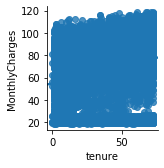

In [49]:
import seaborn as sns
sns.pairplot(df,x_vars=["tenure"],y_vars="MonthlyCharges",kind='reg')